<a href="https://colab.research.google.com/github/ppn101/Projects/blob/main/Wine_Quality_Estimator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#First, I will import all the required libraries and function that are required for constructing the model.
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
#pip install -U matplotlib

In [3]:
#Now i will be fetching the csv and storing it as a dataframe for further processing.
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/winequality-red 2.csv")

In [4]:
#Now i will return the first 3 rows of the dataframe to get a sense of the contents in the dataframe.
df.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


In [5]:
#Now i will get an idea about the number of rows and columns in the dataframe
df.shape

(1599, 12)

In [6]:
#Now i will check the stastical summary for each column to get a sense of the statistical metrics.
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
#Now i will check the spread of instances for each quality rating/value
df["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [8]:
#Now i will check if there are any columns with null values in them.
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

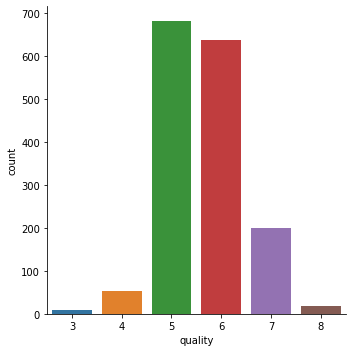

In [9]:
#Now i will create a frequency plot for the quality values.
sns.catplot(x = "quality", data = df, kind = "count")

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

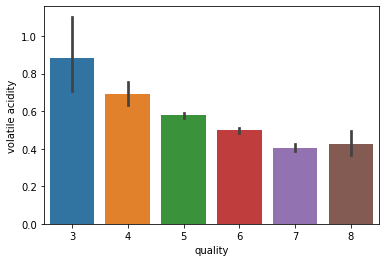

In [10]:
#Now i will plot a barplot for the volatile acidity wrt to the quality of the wine.
#plot = plt.figure(figsize=(5,5))
sns.barplot(y = "volatile acidity", x = "quality", data = df)

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

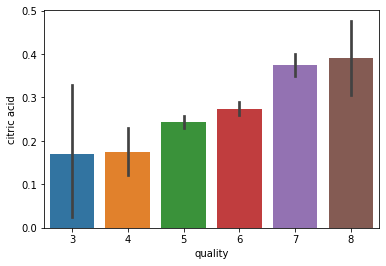

In [11]:
#Now i will plot a barplot for the citric acidity wrt to the quality of the wine.
#plot = plt.figure(figsize=(5,5))
sns.barplot(y = "citric acid", x = "quality", data = df)

In [12]:
#Now i will check the correlation among variables in the entire dataframe.
correlation = df.corr()
correlation

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<AxesSubplot:>

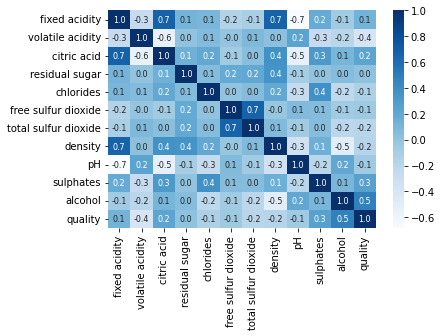

In [29]:
#Now i will be constructing a heatmap to understand the correlation better visually.
sns.heatmap(correlation, cbar = True, fmt = '.1f', annot = True, annot_kws = {'size': 8}, cmap = 'Blues')
#cbar has been used to show a correlation gradient bar as a legend for quick reference.
#fmt has been used to show the correlation coeficients values till the first decimal place.
#annot has been used to show the correlation values on the heatmap with the hues.
#annot_kws has been used to set the font size for the correlation values in the heatmap.
#cmap has been used to make the heatmap in the blue color gradient.

In [30]:
#Now i will be seperating the features(data) and the label.
features = df.drop(columns = "quality", axis = 1)
label = df["quality"]

In [32]:
print(features.shape)
print(label.shape)

(1599, 11)
(1599,)


In [36]:
 #Now i will change the label into binary values instead of categories/scale. For this i will be using label binarization.
 label_binarized = label.apply(lambda value: 1 if value >= 7 else 0)

In [48]:
label_binarized.head(3)

0    0
1    0
2    0
Name: quality, dtype: int64

In [41]:
#Now i need to split the data into training data and test data
features_train, features_test, label_binarized_train, label_binarized_test = train_test_split(features, label_binarized, test_size= 0.1, random_state = 1, stratify = label_binarized)

In [42]:
#Now i will perform a hygiene check in order to establish how the splitting took place.
print(features_train.shape)
print(features_test.shape)
print(label_binarized_train.shape)
print(label_binarized_test.shape)

(1439, 11)
(160, 11)
(1439,)
(160,)


In [43]:
#Now i will initialise the model and train it on feature and label data.
classifier = RandomForestClassifier()
classifier.fit(features_train, label_binarized_train)

RandomForestClassifier()

In [46]:
#Now i will check the accuracy of the model on training data
predict_train = classifier.predict(features_train)
train_accuracy = accuracy_score(predict_train, label_binarized_train)
print(round(train_accuracy,2)*100)

100.0


In [47]:
#Now i will check the accuracy of the model on test data
predict_test = classifier.predict(features_test)
test_accuracy = accuracy_score(predict_test, label_binarized_test)
print(round(test_accuracy,2)*100)

94.0


In [ ]:
#Now i will build a prediction system to tackle fresh input data
input_data = ()

#Now, i need to change it to an array from a list for faster processing.
input_array = np.asarray(input_data)

#Now i need to transform this data into workable format for one instance.
input_transform = input_array.reshape(1,-1)

#Now i need to run the model on the input data
predictor = classifier.predict(input_transform)

#Now i will create a conditinal statement to complement the result obtained by the model.
if (predictor[0] == 1):
  print("The wine is of Good Quality")
else:
  print("The wine is of Bad Quality")